Daniel Kadyrov

Stevens ID: 10455680

CS557 - Natural Language Processing

Group 32 - Daniel Kadyrov

# Part 1 

Create a version of the neural network to solve the XOR (J&M 3rd Section 7.2) problem. There are online tutorials that you can mimic (g., http://mccormickml.com/tutorials/ (Links to an external site.) and http://www.di.unito.it/~cancelli/retineu11_12/FNN.pdf (Links to an external site.)). Specify the initial weights and biases, and use Excel Solver or steepest descent, or any other optimizer available in the software you are using, to find the best values of the weights and biases. Python should have packages. The initial values may need to be close to the known final values for convergence. Report what you did and what you found.

In [2]:
import numpy as np

X = np.array([
    [0, 0],
    [0, 1], 
    [1, 0],
    [1, 1]
])

Y = np.array([[0], [1], [1], [0]])

In [3]:
input = 2
hidden = 2
output = 1

# Initialize Weights
hidden_weights = np.random.uniform(size=(input, hidden))
hidden_bias = np.random.uniform(size=(1, hidden))

hidden_weights, hidden_bias


(array([[0.07980538, 0.89644602],
        [0.01552484, 0.5351104 ]]),
 array([[0.75651766, 0.48863294]]))

In [4]:
# Initialize Expected Values

output_weights = np.random.uniform(size=(hidden, output))
output_bias = np.random.uniform(size=(1, output))
 
output_weights, output_bias

(array([[0.98092222],
        [0.67299289]]),
 array([[0.25738807]]))

In [5]:
# Forward Propogation follows Sigmoid Function
def sigmoid(x):
    return 1/(1+np.exp(-x))

# Back Propogation follows the Derivative of the Sigmoid Function
def sigmoid_derivative(x):
    return x * (1-x)

In [6]:
iter = 10000 # Epochs
lr = 0.1 # Learning Rate

for i in range(iter): 
    # Forward Propogation
    hidden_activation = np.dot(X, hidden_weights)
    hidden_activation += hidden_bias
    hidden_output = sigmoid(hidden_activation)

    output_activation = np.dot(hidden_output, output_weights)
    output_activation += output_bias
    predicted = sigmoid(output_activation)

    # Back Propogation
    error = Y - predicted
    d_predicted = error * sigmoid_derivative(predicted)

    error_hidden = d_predicted.dot(output_weights.T)
    d_hidden = error_hidden * sigmoid_derivative(hidden_output)

    # Update Weights and Bias
    output_weights += hidden_output.T.dot(d_predicted) * lr
    output_bias += np.sum(d_predicted, axis=0, keepdims=True) * lr 
    hidden_weights += X.T.dot(d_hidden) * lr 
    hidden_bias += np.sum(d_hidden, axis=0, keepdims=True) * lr 

predicted

array([[0.06101185],
       [0.94165583],
       [0.94166966],
       [0.06439587]])

In [7]:
from sklearn.metrics import max_error

# Calculate Error
max_error(Y, predicted)

0.06439586772402374

# Part 2 

Respond to Exercises 5.1-3 and 5.11 from Ch5 in J&M 2nd (same as in J&M Ch8).

## Exercise 5.1 

Find one tagging error in each of the following sentences that are tagged with the Penn Treebank tagset:

1. I/PRP need/VBP a/DT flight/NN from/IN Atlanta/NN

2. Does/VBZ this/DT flight/NN serve/VB dinner/NNS

3. I/PRP have/VB a/DT friend/NN living/VBG in/IN Denver/NNP

4. Can/VBPyou/PRPlist/VBthe/DTnonstop/JJafternoon/NNflights/NNS


**Answer**

1. flight/NN

2. dinner/NN

3. have/VBP

4. list/VB

## Exercise 5.2

Use the Penn Treebank tagset to tag each word in the following sentences from Damon Runyon’s short stories. You may ignore punctuation. Some of these are quite difficult; do your best.

1. It is a nice night.

2. This crap game is over a garage in Fifty-second Street...

3. ...Nobody ever takes the newspapers she sells...

4. He is a tall, skinny guy with a long, sad, mean-looking kisser, and a
mournful voice.

5. ...I am sitting in Mindy’s restaurant putting on the gefillte fish, which is
a dish I am very fond of, ...

6. When a guy and a doll get to taking peeks back and forth at each other,
why there you are indeed.

**Answer**

1. It/PRP is/VBZ a/DT nice/JJ night/NN 

2. This/DT crap/NN game/NN is/VBZ over/IN a/DT garage/NN in/IN Fifty-second/NNP Street/NNP

3. Nobody/NN ever/RB takes/VBZ the/DT newspapers/NNS she/PRP sells/VBZ

4. He/PRP is/VBZ a/DT tall/JJ skinny/JJ guy/NN with/IN a/DT long/JJ sad/JJ mean-looking/JJ kisser/NN and/CC a/DT mournful/JJ voice/NN

5. I/PRP am/VBP sitting/VBG in/IN Mindy/NNP ’s/POS restaurant/NN putting/VBG on/RP the/DT gefillte/NN fish/NN which/WDT is/VBZ a/DT dish/NN I/PRP am/VBP very/RB fond/JJ of/RP

6. When/WRB a/DT guy/NN and/CC a/DT doll/NN get/VBP to/TO taking/VBG peeks/NNS back/RB and/CC forth/RB at/IN each/DT other/JJ why/WRB there/EX you/PRP are/VBP indeed/RB

## Exercise 5.3 

Now compare your tags from the previous exercise with one or two friend’s answers. On which words did you disagree the most? Why?

**Answer**

N/A. i have no friends :( 

## Exercise 5.11

Read Norvig (2007) and implement one of the extensions he suggests to his Python noisy channel spell checker.


In this output we show the call to correction and the actual and expected results (with the WORDS counts in parentheses). Counts of (0) mean the target word was not in the dictionary, so we have no chance of getting it right. We could create a better language model by collecting more data, and perhaps by using a little English morphology (such as adding "ility" or "able" to the end of a word).

Another way to deal with unknown words is to allow the result of correction to be a word we have not seen. For example, if the input is "electroencephalographicallz", a good correction would be to change the final "z" to an "y", even though "electroencephalographically" is not in our dictionary. We could achieve this with a language model based on components of words: perhaps on syllables or suffixes, but it is easier to base it on sequences of characters: common 2-, 3- and 4-letter sequences.

In [9]:
import spell

# Original Correction Function 
spell.correction("addresable")

'addresable'

In [10]:
from nltk.tokenize import SyllableTokenizer

word = "addresable"

def correction(word): 
    candidates = spell.candidates(word)

    if len(candidates) == 1: 
        options = ["ility", "able"]
        for option in options: 
            candidates += spell.candidates(word+option)

        SSP = SyllableTokenizer()

        word_syll = SSP.tokenize(word) 
        
        wordd = ""
        for syll in word_syll: 
            wordd += syll
            candidates += spell.candidates(wordd)

    correct = max(candidates, key=spell.P)

    if correct == word: 
        correct = "No correct spelling found"

    return correct

correction(word)


'address'

# Part 3 

Perform and report on the 4 Your Turn practices (pps 180, 184, 186, 189) in BKL Ch5

## Your Turn p180

Many words, like ski and race, can be used as nouns or verbs with no difference in pronunciation. Can you think of others? Hint: think of a commonplace object and try to put the word to before it to see if it can also be a verb, or think of an action and try to put the before it to see if it can also be a noun. Now make up a sentence with both uses of this word, and run the POS tagger on this sentence.

In [11]:
import nltk

text = nltk.word_tokenize("i like to swim")
nltk.pos_tag(text)

[('i', 'NNS'), ('like', 'VBP'), ('to', 'TO'), ('swim', 'VB')]

In [12]:
text = nltk.word_tokenize("i like the swim")
nltk.pos_tag(text)

[('i', 'NN'), ('like', 'IN'), ('the', 'DT'), ('swim', 'NN')]

## Your Turn p184

Plot the frequency distribution just shown using tag_fd.plot(cumulative=True). What percentage of words are tagged using the first five tags of the above list?


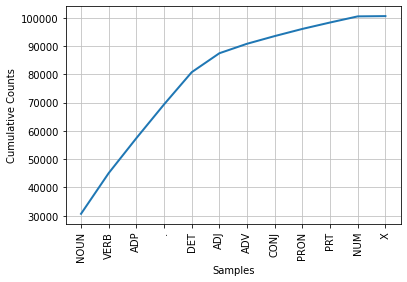

<AxesSubplot:xlabel='Samples', ylabel='Cumulative Counts'>

In [13]:
brown_news_tagged = nltk.corpus.brown.tagged_words(categories="news", tagset="universal")
tag_fd = nltk.FreqDist(tag for (word, tag) in brown_news_tagged)
tag_fd.plot(cumulative=True)

In [14]:
tags = list(tag_fd.keys())[:5]
count = 0 
for i in range(len(brown_news_tagged)):
    if brown_news_tagged[i][1] in tags: 
        count += 1

count/len(brown_news_tagged) * 100


75.0870179207192

## Your Turn Page 186

Given the list of past participles specified by cfd2\['VN'\].keys(), try to collect a list of all the word-tag pairs that immediately precede items in that list.

In [15]:
wsj = nltk.corpus.treebank.tagged_words(tagset="universal")
cfd2 = nltk.ConditionalFreqDist((tag, word) for (word, tag) in wsj)

pre_VN = []

for i in range(len(wsj)): 
    if wsj[i][0] in cfd2["VN"].keys():
        pre_VN.append(wsj[(i-1):(i+1)])

pre_VN

[]

## Your Turn Page 189

Open the POS concordance tool nltk.app.concordance() and load the complete Brown Corpus (simplified tagset). Now pick some of the words listed at the end of the previous code example and see how the tag of the word correlates with the context of the word. E.g., search for near to see all forms mixed together, near/ADJ to see it used as an adjective, near N to see just those cases where a noun follows, and so forth.

In [16]:
nltk.app.concordance()

# Part 4

Use the sentence tokenizer as shown in BKL Section 3.8 p112 to find the longest sentence in the texts mentioned in Assignment 2.  Show these along with the one found between consecutive periods. Same sentence? Any resemblance?

In [17]:
# From Assignment 2 
from nltk.corpus import inaugural

max_len = 0
max_sent = ""

for sentance in inaugural.sents(): 
    if len(sentance) > max_len:
        max_len = len(sentance)
        max_sent = sentance

print(max_len)
print(" ".join(max_sent))

810
On this subject it might become me better to be silent or to speak with diffidence ; but as something may be expected , the occasion , I hope , will be admitted as an apology if I venture to say that if a preference , upon principle , of a free republican government , formed upon long and serious reflection , after a diligent and impartial inquiry after truth ; if an attachment to the Constitution of the United States , and a conscientious determination to support it until it shall be altered by the judgments and wishes of the people , expressed in the mode prescribed in it ; if a respectful attention to the constitutions of the individual States and a constant caution and delicacy toward the State governments ; if an equal and impartial regard to the rights , interest , honor , and happiness of all the States in the Union , without preference or regard to a northern or southern , an eastern or western , position , their various political opinions on unessential points or their per

In [19]:
from nltk.tokenize import sent_tokenize

sents = sent_tokenize(inaugural.raw())
max_sent = max(sents, key=len)

print(len(max_sent))
print(max_sent)

4345
On this subject it might become me better to be silent or to speak with diffidence; but as something may be expected, the occasion, I hope, will be admitted as an apology if I venture to say that if a preference, upon principle, of a free republican government, formed upon long and serious reflection, after a diligent and impartial inquiry after truth; if an attachment to the Constitution of the United States, and a conscientious determination to support it until it shall be altered by the judgments and wishes of the people, expressed in the mode prescribed in it; if a respectful attention to the constitutions of the individual States and a constant caution and delicacy toward the State governments; if an equal and impartial regard to the rights, interest, honor, and happiness of all the States in the Union, without preference or regard to a northern or southern, an eastern or western, position, their various political opinions on unessential points or their personal attachments; 